In [1]:
import arff, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



In [2]:
dataset = arff.load(open('cocomo811.arff'))
data=np.array(dataset['data'])

In [3]:
data.shape

(63, 17)

In [4]:
X=data[:,0:16]
Y=data[:,16:17]

In [5]:
Y=Y.reshape(63)

In [6]:
X.shape

(63, 16)

# Cocomo n_estimator=100 and max_features= 1 to 16

In [51]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [52]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

In [57]:
n_feature=7
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,11):   
    clf= RandomForestRegressor(n_estimators=100,max_features=i)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [58]:
MMRE_list

[0.7971338091857509,
 0.7678155233445535,
 0.7518933931836663,
 0.7749452835675603,
 0.7588313003445126,
 0.7688729198148886,
 0.78671109305838,
 0.7669305754274645,
 0.7734761681310482,
 0.7714228328824447]

In [59]:
MdMRE_list

[0.7688888888888888,
 0.7751219512195122,
 0.7836585365853659,
 0.8080487804878049,
 0.7963414634146341,
 0.8096341463414635,
 0.8148780487804878,
 0.8292682926829268,
 0.8026923076923076,
 0.8213076923076923]

In [60]:
Pred_list

[0.0,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 0.0,
 0.0,
 5.263157894736842,
 0.0,
 0.0]

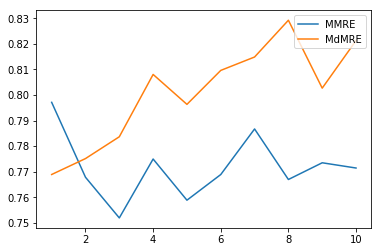

In [61]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,11)

plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

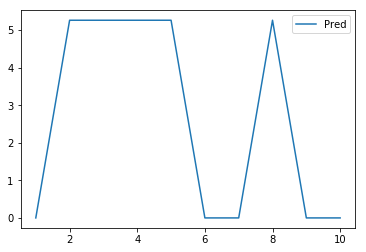

In [62]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# COCOMO n_estimator=100 to 2000 and max_features= 7


In [83]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,1100,100):   
    clf= RandomForestRegressor(n_estimators=i,max_features=7)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [84]:
MMRE_list

[0.7808978175154454,
 0.7701772927661539,
 0.7670331265707331,
 0.7678005333915134,
 0.7688930165767264,
 0.7674646568513901,
 0.7728694215267984,
 0.7725009193040682,
 0.7739206573869396,
 0.7679683151012039]

In [85]:
MdMRE_list

[0.8207317073170731,
 0.8136585365853658,
 0.8110569105691057,
 0.8114634146341463,
 0.8136461538461539,
 0.8228589743589744,
 0.8094773519163763,
 0.8243365384615384,
 0.8141869918699187,
 0.8131615384615385]

In [86]:
Pred_list

[0.0, 0.0, 5.263157894736842, 5.263157894736842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

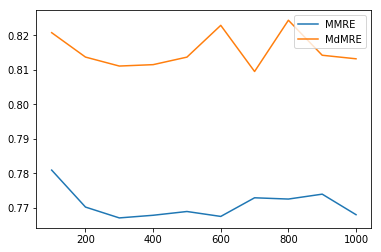

In [87]:
x = np.arange(100,1100,100)
plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

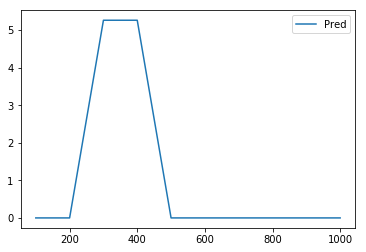

In [88]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# GridSearchCV

In [71]:
params_grd={
 'max_features': [1,2,3,4,5,6,7,8,9,10],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [72]:
clf= RandomForestRegressor()
grd_search=GridSearchCV(estimator = clf, param_grid = params_grd, 
                          cv = 10, n_jobs = -1, verbose = 2)
grd_search.fit(X_train, training_scores_encoded)
best_grid = grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.2min finished
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
print(MMRE)
print(MdMRE)
print(Pred)

0.768212596049101
0.8173846153846154
5.263157894736842


In [74]:
grd_search.best_params_

{'max_features': 9, 'n_estimators': 200}


# Random Hyperparameter Grid

In [75]:
Random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1,2,3,4,5,6,7,8,9,10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [76]:
clf= RandomForestRegressor()
random_grd_search=RandomizedSearchCV(estimator = clf, param_distributions = Random_grid, n_iter = 80, cv = 10, 
                              verbose=2, random_state=42, n_jobs = -1)
random_grd_search.fit(X_train, training_scores_encoded)
best_grid = random_grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.6min finished
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [77]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7578352266691194
0.8039583333333333
5.263157894736842


In [78]:
random_grd_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 9,
 'max_depth': 70,
 'bootstrap': False}

#  Regression Tree Analysis

In [81]:
clf= DecisionTreeRegressor(max_depth=30, min_samples_split=20)
clf.fit(X_train, training_scores_encoded)
Y_pred=clf.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

In [82]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7569677376178159
0.8394062078272605
5.263157894736842
